### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [8]:
print(tienda.info())
print(tienda2.info())
print(tienda3.info())
print(tienda4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data col

In [11]:
print(tienda.shape)
print(tienda2.shape)
print(tienda3.shape)
print(tienda4.shape)

(2359, 12)
(2359, 12)
(2359, 12)
(2358, 12)


#1. Análisis de facturación



In [19]:
# Se procede a realizar la suma de la columna "Precios" en cada tabla para calcular el ingreso total

ingreso_total_t1 = tienda['Precio'].sum()
ingreso_total_t2 = tienda2['Precio'].sum()
ingreso_total_t3 = tienda3['Precio'].sum()
ingreso_total_t4 = tienda4['Precio'].sum()

print(ingreso_total_t1)
print(tienda['Precio'].sum())

1150880400.0
1150880400.0


In [ ]:
# podemos concatenar los resultados y mostrarlos en un gráfico para poder tener una mejor visibilidad

ingreso_total = pd.DataFrame({
    'Tienda' : ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4'],
    'Ingresos_Totales' : [ingreso_total_t1, ingreso_total_t2, ingreso_total_t3, ingreso_total_t4]
})

# investigando, encontré que es necesario formatear los resultados de pandas ya que puede devolver en formato científico los valores númericos extensos
# por lo que es necesario aplicar el siguiente código para poder mostrarlos como float:

pd.set_option('display.float_format', '{:,.2f}'.format)

print(ingreso_total)

     Tienda  Ingresos_Totales
0  Tienda_1  1,150,880,400.00
1  Tienda_2  1,116,343,500.00
2  Tienda_3  1,098,019,600.00
3  Tienda_4  1,038,375,700.00


C:\Users\david\AppData\Local\Temp\ipykernel_6352\1571945910.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  gr_ingresos_t.figure.show()


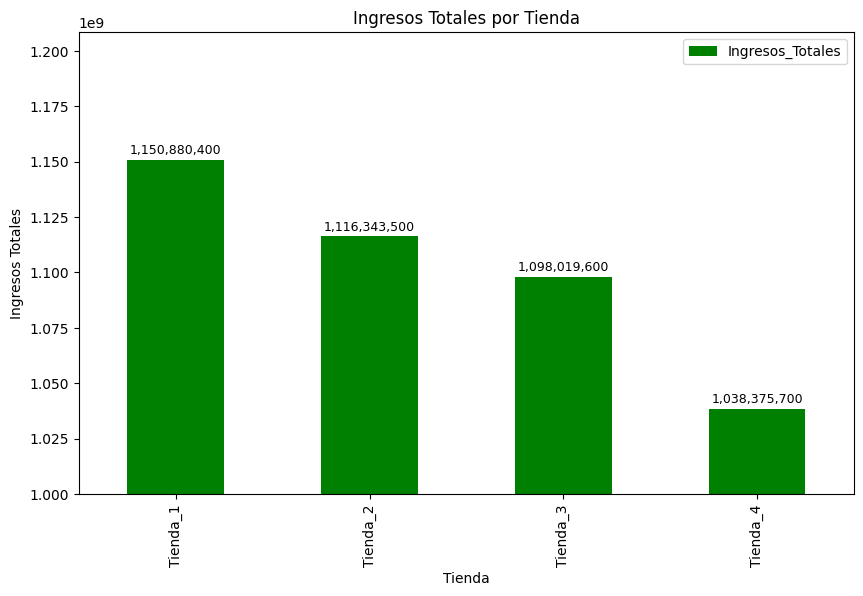

In [35]:
gr_ingresos_t = ingreso_total.plot(x= 'Tienda', y= 'Ingresos_Totales', kind='bar', color='green', figsize=(10, 6))

# al tratarse de miles de millones, podemos empezar el gráfico desde el 1B para hacerlo mas visible
gr_ingresos_t.set_ylim(1000000000, None)

# Podemos agregarle etiquetas al gráfico
gr_ingresos_t.bar_label(
    gr_ingresos_t.containers[0],
    labels=[f"{x:,.0f}" for x in ingreso_total['Ingresos_Totales']], #esto para el formato cientifico
    label_type='edge',
    padding=2,
    fontsize=9,
    color='black'
)

gr_ingresos_t.set_title('Ingresos Totales por Tienda')
gr_ingresos_t.set_xlabel('Tienda')
gr_ingresos_t.set_ylabel('Ingresos Totales')

gr_ingresos_t.figure.show()

# Podemos ver que la tienda 1 es la que tiene mayores ingresos, mientras que la tienda 4 es la que tiene menor cantidad de ingresos

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda